<center><h2>Hands-On Challenge: Advanced Analysis and Feature Space Creation with <br>Open Data Cube, STAC and Geopandas</h2></center>

In the realm of Earth Observation (EO) and remote sensing, the process of extracting meaningful insights from satellite data often involves the use of machine learning (ML) techniques. However, the success of these ML models heavily relies on the `quality and robustness of the feature space` used to train them.

<b>Why is a Robust Feature Space Crucial?</b>

1. Enhanced Model Performance
2. Reduction of Overfitting
3. Improved Interpretability:
4. Efficiency in Data Processing
5. Adaptability to Different Applications
***

 ### Input Data
 
<b>EuroCrops</b> is a `harmonized dataset` containing detailed information about crop types across several European countries. The dataset is designed to support various applications in agriculture, environmental monitoring, and land-use planning by providing standardized crop classification data
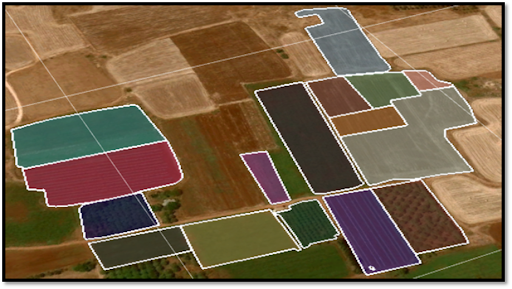

### Objectives

The main objective of this task is to create a robust and detailed feature space (fs) by leveraging `Sentinel satellite imagery` and the `EuroCrops shapefile`. This feature space will serve as a foundation for ML models, enabling accurate and insightful analyses. The specific goals are described step by step below

### Task 1: Undestanding the dataset

#### 1.1 Load EuroCrops Shapefile Using Geopandas

In [18]:
import geopandas as gpd
parcels = gpd.read_file('demo_eurocrops.geojson')

#### 1.2 Explore the columns of the shapefile, show the attributes of some rows to understand the structure

In [19]:
parcels.head()

recno                   crpname   crpgrpc            crpgrpn  \
0    463  ACKERBOHNEN (PUFFBOHNEN)  33111022  leguminous_plants   
1    464  ACKERBOHNEN (PUFFBOHNEN)  33111022  leguminous_plants   
2    504  ACKERBOHNEN (PUFFBOHNEN)  33111022  leguminous_plants   
3    577  ACKERBOHNEN (PUFFBOHNEN)  33111022  leguminous_plants   
4    578  ACKERBOHNEN (PUFFBOHNEN)  33111022  leguminous_plants   

        NUTS_NAME  org_id  borderParc       use       r1  az_id_org NUTS_ID  \
0  Nordburgenland     463           0  training  1000462          1   AT112   
1  Nordburgenland     464           0  training  1000463          1   AT112   
2  Nordburgenland     504           0  training  1000503          1   AT112   
3  Nordburgenland     577           0  training  1000576          1   AT112   
4  Nordburgenland     578           0  training  1000577          1   AT112   

   country                                           geometry  
0  austria  MULTIPOLYGON (((16.4238 47.82078, 16.42302 47....  
1  austria  MULTIPOLYGON (((16.4207 47.82809, 16.42025 47....  
2  austria  MULTIPOLYGON (((16.31004 47.80296, 16.30982 47...  
3  austria  MULTIPOLYGON (((16.40648 47.79812, 16.40639 47...  
4  austria  MULTIPOLYGON (((16.4066 47.78727, 16.40639 47....

In [21]:
parcels.columns

Index(['recno', 'crpname', 'crpgrpc', 'crpgrpn', 'NUTS_NAME', 'org_id',
       'borderParc', 'use', 'r1', 'az_id_org', 'NUTS_ID', 'country',
       'geometry'],
      dtype='object')

In [22]:
rows, cols = parcels.shape
rows,cols

(6331, 13)

#### 1.3 Print Basic Details of the shapefile as the shape, the number of parcels per crop category etc

In [27]:
parcels_per_category = parcels.crpgrpn.value_counts()
parcels_per_category

crpgrpn
winter_common_wheat_and_spelt                     1385
pasture_meadow                                     994
grain_maize                                        771
soya                                               601
other_plants_harvested_green                       397
vineyards                                          371
others                                             245
winter_barley                                      245
sunflower_and_yellow_bloomer                       245
leguminous_plants                                  156
sugar_beet                                         153
winter_triticale                                   114
fresh_vegetables_melons_and_strawberries           102
winter_rye                                          74
winter_rape                                         68
millet                                              66
winter_durum_wheat                                  65
summer_durum_wheat                                  64
ot

#### 1.4 Save into a list the unique crop categories

In [29]:
total_categories = parcels.crpgrpn.nunique()
total_categories

31

#### 1.5 Plot Geometries of Crop Parcels on a Map 

In [30]:
parcels.explore()

#### 1.6 Provide summary statistics for key attributes (e.g., crop type, area).

In [34]:
parcels['area'] = parcels.geometry.area
parcels.groupby('crpgrpn')['area'].mean()

C:\Users\thana\AppData\Local\Temp\ipykernel_28676\2173384806.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parcels['area'] = parcels.geometry.area


crpgrpn
arable_land_seed_and_seedlings                    1.766553e-06
aromatic_plants_medicinal_and_culinary_plants     1.444510e-06
cucurbits                                         1.100973e-06
fresh_vegetables_melons_and_strawberries          1.586800e-06
fruit_of_temperate_climate_zones                  4.654990e-07
grain_maize                                       2.071663e-06
leguminous_plants                                 1.883975e-06
millet                                            1.802636e-06
not_known                                         4.510701e-07
nuts                                              1.085284e-06
other_cereals_for_the_production_of_grain         4.416213e-07
other_industrial_crops_not_mentioned_elsewhere    3.206440e-06
other_oil_seed_crops                              3.854765e-07
other_plants_harvested_green                      1.170766e-06
others                                            4.205637e-08
pasture_meadow                                 

#### 1.7. Keep only the ten largest, in terms of area, parcels to work with

In [36]:
biggest_parcels = parcels.sort_values(by='area', ascending=False)[:10]
biggest_parcels

recno            crpname   crpgrpc                        crpgrpn  \
2822  616435         SOJABOHNEN  33106060                           soya   
2669  615419         SOJABOHNEN  33106060                           soya   
2193  272532            LUZERNE  33111023   other_plants_harvested_green   
2992  627726       SOMMERGERSTE  33101041                  summer_barley   
4464  821128       WINTERGERSTE  33101042                  winter_barley   
5644  882927  WINTERWEICHWEIZEN  33101012  winter_common_wheat_and_spelt   
2192  272531            LUZERNE  33111023   other_plants_harvested_green   
3347  646729       SONNENBLUMEN  33106050   sunflower_and_yellow_bloomer   
5643  882920  WINTERWEICHWEIZEN  33101012  winter_common_wheat_and_spelt   
2670  615420         SOJABOHNEN  33106060                           soya   

           NUTS_NAME  org_id  borderParc       use       r1  az_id_org  \
2822  Nordburgenland  616435           0  training  1616434          1   
2669  Nordburgenland  615419           0  training  1615418          1   
2193  Nordburgenland  272532           0  training  1272531          1   
2992  Nordburgenland  627726           0  training  1627725          1   
4464  Nordburgenland  821128           0  training  1821127          1   
5644  Nordburgenland  882927           0  training  1882926          1   
2192  Nordburgenland  272531           0  training  1272530          1   
3347  Nordburgenland  646729           0  training  1646728          1   
5643  Nordburgenland  882920           0  training  1882919          1   
2670  Nordburgenland  615420           0  training  1615419          1   

     NUTS_ID  country                                           geometry  \
2822   AT112  austria  MULTIPOLYGON (((16.42677 47.8003, 16.42491 47....   
2669   AT112  austria  MULTIPOLYGON (((16.44615 47.88726, 16.44536 47...   
2193   AT112  austria  MULTIPOLYGON (((16.36816 47.8209, 16.36813 47....   
2992   AT112  austria  MULTIPOLYGON (((16.44886 47.89224, 16.44883 47...   
4464   AT112  austria  MULTIPOLYGON (((16.44688 47.81823, 16.44683 47...   
5644   AT112  austria  MULTIPOLYGON (((16.37326 47.81698, 16.37318 47...   
2192   AT112  austria  MULTIPOLYGON (((16.39475 47.81105, 16.39311 47...   
3347   AT112  austria  MULTIPOLYGON (((16.38293 47.81734, 16.38255 47...   
5643   AT112  austria  MULTIPOLYGON (((16.39263 47.81948, 16.39218 47...   
2670   AT112  austria  MULTIPOLYGON (((16.44776 47.88978, 16.4442 47....   

          area  
2822  0.000041  
2669  0.000040  
2193  0.000039  
2992  0.000036  
4464  0.000034  
5644  0.000034  
2192  0.000031  
3347  0.000029  
5643  0.000029  
2670  0.000025

### Task 2: Stream and Work with Satellite Data

#### 2.1 Stream data for each one these 10 parcels for the whole year of 2023. Use Sentinel-2 and if it possible Sentinel-1 also. 

In [ ]:
!pip install rasterio==1.3.10

In [50]:
from shapely import wkt
%matplotlib inline
import rasterio
# Force GeoPandas to use Shapely instead of PyGEOS
# In a future release, GeoPandas will switch to using Shapely by default.
import os
import datacube
import matplotlib.pyplot as plt
import geopandas as gpd
from datacube.utils import geometry
from dea_tools.plotting import rgb
from dea_tools.spatial import xr_rasterize

import pyproj
import pystac_client
import xarray as xr
from shapely.geometry import box
from shapely.ops import transform
import matplotlib.pyplot as plt
import pandas as pd
from dask.distributed import Client
import odc.stac
from odc.geo.geobox import GeoBox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from geogif import gif, dgif
from dea_tools.plotting import display_map, rgb

In [42]:
polygons = []
for key,value in biggest_parcels.iterrows():
    polygons.append(wkt.loads(value['geometry'].wkt))
biggest_parcels['bounds'] = polygons

# shp_extent = parcels.total_bounds
# xmin, ymin, xmax, ymax = shp_extent

In [67]:
parcel_data = {}
for key, value in biggest_parcels.iterrows():
    xmin,ymin,xmax,ymax = value['bounds'].bounds
    parcel_data[value.recno] = [xmin,ymin,xmax,ymax]
    selected_geom = geometry.Geometry(value.geometry.__geo_interface__,geometry.CRS(f'EPSG:{parcels.crs.to_epsg()}'))
parcel_data[value.recno]

[16.441348810008577, 47.88977552301737, 16.448818903617287, 47.89764034457852]

In [110]:
### Geometry Mask Module

def geometry_mask(geoms, geobox, all_touched=False, invert=False):
    return rasterio.features.geometry_mask([geom.to_crs(geobox.crs) for geom in geoms],
                                           out_shape=geobox.shape,
                                           transform=geobox.affine,
                                           all_touched=all_touched,
                                           invert=invert)

In [117]:
# work for a random parcel
parcel_data = {}
for key, value in biggest_parcels.iterrows():
    xmin,ymin,xmax,ymax = value['bounds'].bounds
    selected_geom = geometry.Geometry(value.geometry.__geo_interface__,geometry.CRS(f'EPSG:{parcels.crs.to_epsg()}'))
    # STAC connection information for Sentinel 2 COGs
    STAC_URL = "https://earth-search.aws.element84.com/v0"
    STAC_COLLECTION = "sentinel-s2-l2a-cogs"
    
    # spatial projection information
    CRS_STRING = "epsg:4326"
    EPSG = pyproj.CRS.from_string(CRS_STRING).to_epsg()
    AOI = box(xmin,ymin,xmax,ymax)
    bounds = (xmin,ymin,xmax,ymax)
    BANDS = ["B04", "B03", "B02","B08","SCL"]
    START_DATE = "2023-01-01"
    END_DATE = "2023-12-31"
    
    # STAC items store bounding box info in epsg:4326
    transformer_4326 = pyproj.Transformer.from_crs(
        crs_from=CRS_STRING,
        crs_to="epsg:4326",
        always_xy=True,
    )
    bbox_4326 = transform(transformer_4326.transform, AOI).bounds
    
    catalog = pystac_client.Client.open(STAC_URL)
    catalog.add_conforms_to("ITEM_SEARCH")
    
    stac_items = catalog.search(
        collections=[STAC_COLLECTION],
        bbox=bbox_4326,
        datetime=[START_DATE, END_DATE],
        query={"eo:cloud_cover": {"lt": 30}}
    )#.item_collection()
    
    # using Open Data Cube stac component
    dx = 3/3600  # ~90m resolution
    dx = 20 / 111320 # ~20m res
    epsg = 4326
    
    geobox = GeoBox.from_bbox(bounds, crs=f"epsg:{epsg}", resolution=dx)
    
    data = odc.stac.load(
        stac_items.items(),
        chunks={},
        geobox=geobox,
        bands=BANDS,
        groupby="solar_day" # delete duplicates due to satellite overlap
    )
    mask = geometry_mask([selected_geom], data.geobox, invert=True)
    data = data.where(mask)
    parcel_data[key] = data 

In [121]:
parcel_data[2822]

<xarray.Dataset> Size: 750kB
Dimensions:      (time: 20, latitude: 39, longitude: 48)
Coordinates:
  * latitude     (latitude) float64 312B 47.81 47.81 47.81 ... 47.8 47.8 47.8
  * longitude    (longitude) float64 384B 16.42 16.42 16.42 ... 16.43 16.43
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 160B 2023-01-07T09:57:20 ... 2023-04-3...
Data variables:
    B04          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>
    B03          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>
    B02          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>
    B08          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>
    SCL          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>

#### 2.2 Mask out cloudy pixels. Plot RGB with and without a cloud mask

In [122]:
data = parcel_data[2822]
mask_without_clouds = (data.SCL < 7) # | (data.SCL == 4) | (data.SCL == 5)
data_masked = data.where(mask_without_clouds)
data_masked

<xarray.Dataset> Size: 750kB
Dimensions:      (time: 20, latitude: 39, longitude: 48)
Coordinates:
  * latitude     (latitude) float64 312B 47.81 47.81 47.81 ... 47.8 47.8 47.8
  * longitude    (longitude) float64 384B 16.42 16.42 16.42 ... 16.43 16.43
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 160B 2023-01-07T09:57:20 ... 2023-04-3...
Data variables:
    B04          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>
    B03          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>
    B02          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>
    B08          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>
    SCL          (time, latitude, longitude) float32 150kB dask.array<chunksize=(1, 39, 48), meta=np.ndarray>

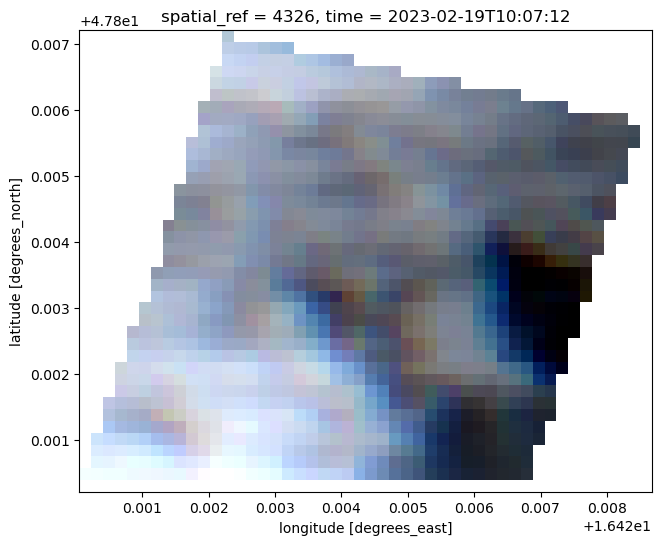

In [123]:
rgb(data, bands=['B04', 'B03', 'B02'], index=5)

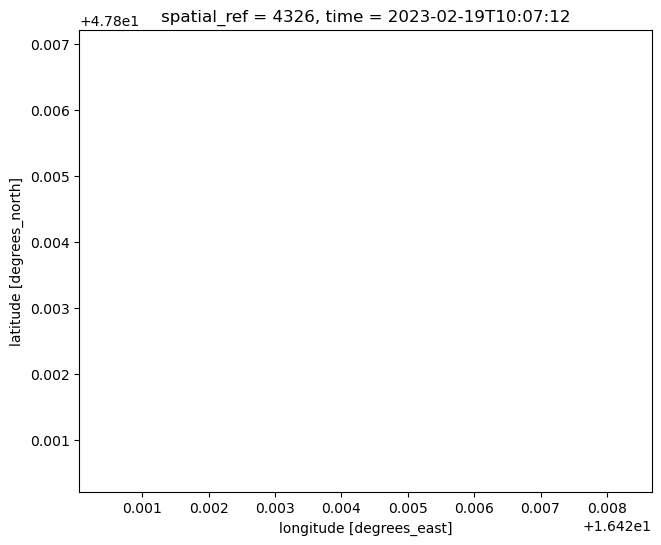

In [124]:
rgb(data_masked, bands=['B04', 'B03', 'B02'], index=5)

#### 2.3 Calculate Vegetation Indices

In [126]:
for key, value in parcel_data.items():
    value['ndvi'] = (value.B08 - value.B04) / (value.B08 + value.B04)
    parcel_data[key] = value

#### 2.4 Aggregate computed indices per parcel (zonal statistics) e.g. mean value of ndvi per parcel 

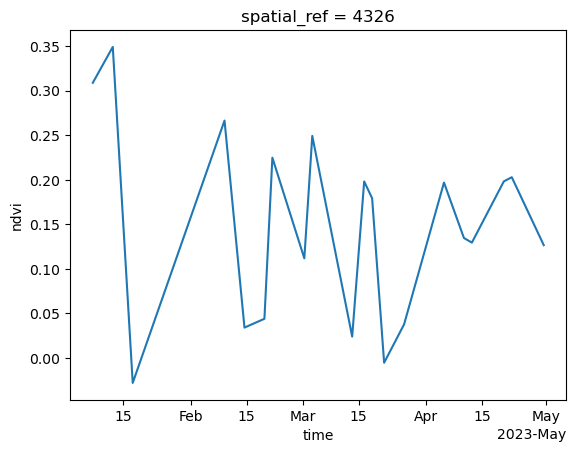

In [129]:
for key, parcel_xarray in parcel_data.items():
    mean_ndvi = parcel_xarray.ndvi.mean(dim=['longitude', 'latitude'])
    mean_ndvi.plot()
    break

#### 2.5 Plot NDVI as an image for a random parcel

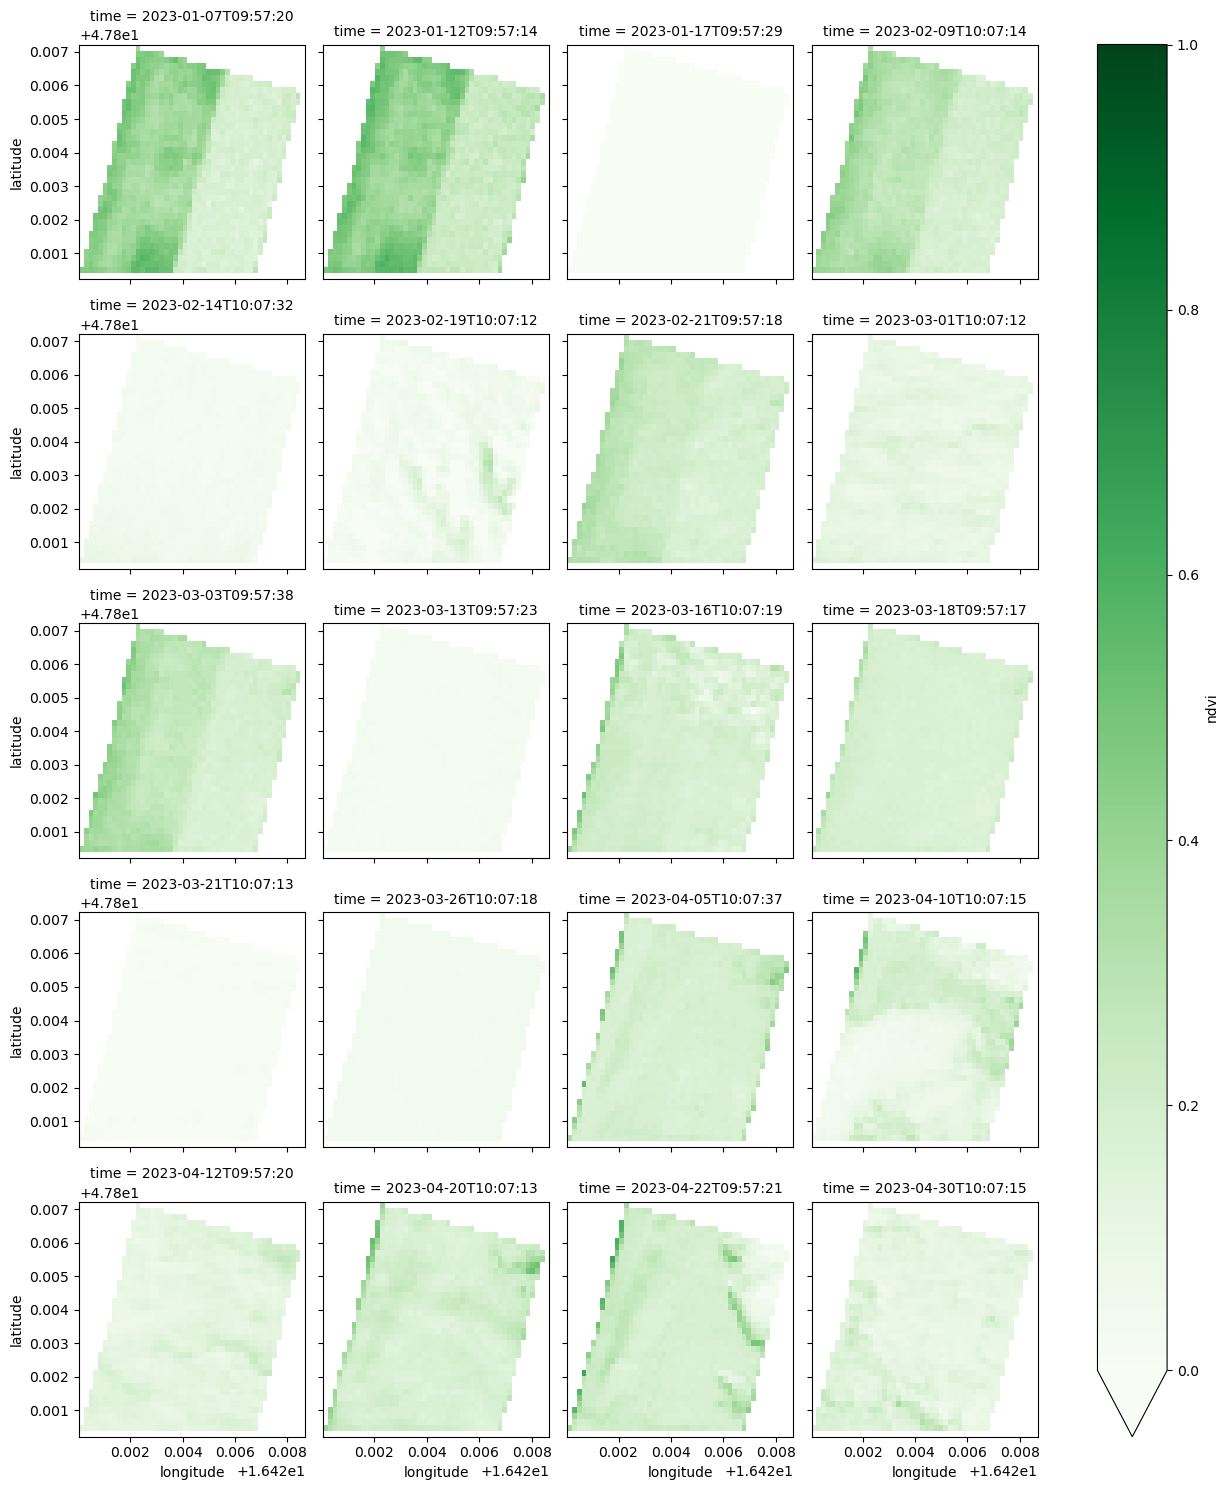

In [130]:
parcel_xarray.ndvi.plot(col='time',col_wrap=4, cmap="Greens",vmin=0,vmax=1)

#### 2.6 Plot NDVI for all the parcels in the same plot

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [06:08<00:00, 36.87s/it]


Text(0, 0.5, 'NDVI')

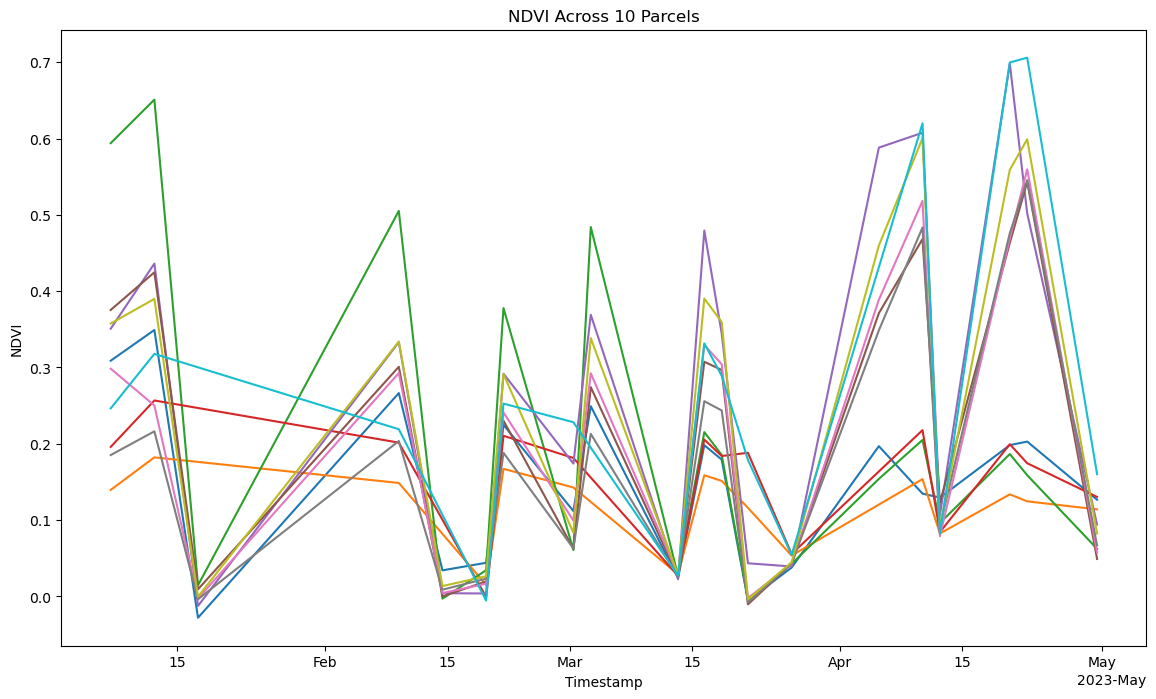

In [133]:
fig, ax = plt.subplots(figsize=(14, 8))
from tqdm import tqdm
for parcel_id, data in tqdm(parcel_data.items()):
    ndvi_of_parcel =  data.ndvi.mean(dim=['latitude', 'longitude'])
    ndvi_of_parcel.plot(ax=ax, label=parcel_id)

ax.set_title('NDVI Across 10 Parcels')
ax.set_xlabel('Timestamp')
ax.set_ylabel('NDVI')

#### 2.8 Replace missing values due to clouds using interpolation, temporal and spatial averaging etc.

In [ ]:
# Interpolating NaN values in each xArray
for parcel_id, data in parcel_data.items():
    parcel_data[parcel_id] = data.interpolate_na(dim='time', method='linear',allow_rechunk=True)

#### 2.9 Aggregate Spectral Features Temporally (e.g. mean value for every month per parcel). Check if these values is needed to be added as features in the fs 

In [ ]:
parcel_data_resampled = {}
for key, parcel_xarray in parcel_data.items():
    parcel_data_resampled[key] =  data.resample(time='M').mean()